<a href="https://colab.research.google.com/github/hitha-varganti/DiabetesPrediction/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSS F24 Internal Project Data/diab_hosp_data.csv')
df.head(20)
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted', 'total_visits'],
      dtype='object')

In [ ]:
df.glucose_test.unique()

array(['no', 'normal', 'high'], dtype=object)

In [ ]:
df.count()

,0
age,25000
time_in_hospital,22761
n_lab_procedures,14461
n_procedures,25000
n_medications,25000
n_outpatient,25000
n_inpatient,25000
n_emergency,25000
medical_specialty,25000
diag_1,25000


In [ ]:
def get_age_range_mean(age_range):
    lower, upper = age_range[1:-1].split('-')
    return (int(lower) + int(upper)) / 2

mean_per_age_group = df.groupby('age')['n_lab_procedures'].transform('mean')

df['n_lab_procedures'] = df['n_lab_procedures'].fillna(mean_per_age_group)
df

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,total_visits
0,[70-80),8.0,42.966492,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no,2
1,[70-80),NaN,34.000000,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no,0
2,[50-60),5.0,42.846363,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes,0
3,[70-80),2.0,36.000000,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes,1
4,[60-70),1.0,42.000000,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,[80-90),14.0,77.000000,1,30,0,0,0,Missing,Circulatory,Other,Circulatory,no,normal,no,no,yes,0
24996,[80-90),2.0,66.000000,0,24,0,0,0,Missing,Digestive,Injury,Other,no,high,yes,yes,yes,0
24997,[70-80),NaN,12.000000,0,6,0,1,0,Missing,Other,Other,Other,normal,no,no,no,yes,1
24998,[70-80),2.0,42.966492,3,15,0,0,0,Family/GeneralPractice,Respiratory,Diabetes,Other,no,no,yes,yes,no,0


In [ ]:
def map_with_random_value(value):
    if value == 'normal':
        return np.random.choice(normal_range)
    elif value == 'high':
        return np.random.choice(high_range)
    else:
        return mapping.get(value, value)

In [ ]:
mapping = {'no': 0}

normal_range = np.arange(70, 100)
high_range = np.arange(126, 200)

df['glucose_test'] = df['glucose_test'].apply(map_with_random_value)
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,total_visits
0,[70-80),8.0,42.966492,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,no,no,yes,no,2
1,[70-80),NaN,34.000000,2,13,0,0,0,Other,Other,Other,Other,0,no,no,yes,no,0
2,[50-60),5.0,42.846363,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,no,yes,yes,yes,0
3,[70-80),2.0,36.000000,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,no,yes,yes,yes,1
4,[60-70),1.0,42.000000,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,no,no,yes,no,0


In [ ]:
def map_with_random_value_A1C(value):
    if value == 'normal':
        return np.random.choice(normal_range_A1C)
    elif value == 'high':
        return np.random.choice(high_rang_A1c)
    else:
        return mapping.get(value, value)

In [ ]:
mapping = {'no': 0}

normal_range_A1C = np.arange(4, 5.7, 0.1)
high_rang_A1c = np.arange(5.7, 9, 0.1)

df['A1Ctest'] = df['A1Ctest'].apply(map_with_random_value_A1C)
df.head(20)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,total_visits
0,[70-80),8.0,42.966492,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0.0,no,yes,no,2
1,[70-80),NaN,34.000000,2,13,0,0,0,Other,Other,Other,Other,0,0.0,no,yes,no,0
2,[50-60),5.0,42.846363,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0.0,yes,yes,yes,0
3,[70-80),2.0,36.000000,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,0.0,yes,yes,yes,1
4,[60-70),1.0,42.000000,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,0.0,no,yes,no,0
5,[40-50),2.0,51.000000,0,10,0,0,0,Missing,Other,Other,Other,0,0.0,no,no,yes,0
6,[50-60),4.0,42.846363,2,21,0,0,0,Missing,Injury,Other,Other,0,4.3,yes,yes,no,0
7,[60-70),1.0,42.599941,6,16,0,0,1,Other,Circulatory,Other,Other,0,0.0,no,yes,yes,1
8,[80-90),4.0,67.000000,3,13,0,0,0,InternalMedicine,Digestive,Other,Other,0,0.0,no,no,yes,0
9,[70-80),8.0,37.000000,1,18,0,0,0,Family/GeneralPractice,Respiratory,Respiratory,Other,0,0.0,yes,yes,no,0


In [ ]:
df = df[df['change'] != 'ERROR']
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted,total_visits
0,[70-80),8.0,42.966492,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0.0,no,yes,no,2
1,[70-80),NaN,34.000000,2,13,0,0,0,Other,Other,Other,Other,0,0.0,no,yes,no,0
2,[50-60),5.0,42.846363,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0.0,yes,yes,yes,0
3,[70-80),2.0,36.000000,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,0.0,yes,yes,yes,1
4,[60-70),1.0,42.000000,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,0.0,no,yes,no,0


In [ ]:
df = df.drop(['medical_specialty'], axis=1)

In [ ]:
df = df.drop(['total_visits'], axis=1)

In [ ]:
def map_age(value):
    if value == '[40-50)':
      return 40
    elif value == '[50-60)':
        return 50
    elif value == '[60-70)':
        return 60
    elif value == '[70-80)':
        return 70
    elif value == '[80-90)':
        return 80
    elif value == '[90-100)':
        return 90

In [ ]:
df['age'] = df['age'].apply(map_age)
df.head(20)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,70,8.0,42.966492,1,18,2,0,0,Circulatory,Respiratory,Other,0,0.0,no,yes,no
1,70,NaN,34.000000,2,13,0,0,0,Other,Other,Other,0,0.0,no,yes,no
2,50,5.0,42.846363,0,18,0,0,0,Circulatory,Circulatory,Circulatory,0,0.0,yes,yes,yes
3,70,2.0,36.000000,0,12,1,0,0,Circulatory,Other,Diabetes,0,0.0,yes,yes,yes
4,60,1.0,42.000000,0,7,0,0,0,Other,Circulatory,Respiratory,0,0.0,no,yes,no
5,40,2.0,51.000000,0,10,0,0,0,Other,Other,Other,0,0.0,no,no,yes
6,50,4.0,42.846363,2,21,0,0,0,Injury,Other,Other,0,4.3,yes,yes,no
7,60,1.0,42.599941,6,16,0,0,1,Circulatory,Other,Other,0,0.0,no,yes,yes
8,80,4.0,67.000000,3,13,0,0,0,Digestive,Other,Other,0,0.0,no,no,yes
9,70,8.0,37.000000,1,18,0,0,0,Respiratory,Respiratory,Other,0,0.0,yes,yes,no


In [ ]:
df = pd.get_dummies(df, columns = ['diag_1', 'diag_2', 'diag_3'])
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,glucose_test,A1Ctest,...,diag_2_Other,diag_2_Respiratory,diag_3_Circulatory,diag_3_Diabetes,diag_3_Digestive,diag_3_Injury,diag_3_Missing,diag_3_Musculoskeletal,diag_3_Other,diag_3_Respiratory
0,70,8.0,42.966492,1,18,2,0,0,0,0.0,...,False,True,False,False,False,False,False,False,True,False
1,70,NaN,34.000000,2,13,0,0,0,0,0.0,...,True,False,False,False,False,False,False,False,True,False
2,50,5.0,42.846363,0,18,0,0,0,0,0.0,...,False,False,True,False,False,False,False,False,False,False
3,70,2.0,36.000000,0,12,1,0,0,0,0.0,...,True,False,False,True,False,False,False,False,False,False
4,60,1.0,42.000000,0,7,0,0,0,0,0.0,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'glucose_test', 'A1Ctest', 'change', 'diabetes_med', 'readmitted',
       'diag_1_Circulatory', 'diag_1_Diabetes', 'diag_1_Digestive',
       'diag_1_Injury', 'diag_1_Missing', 'diag_1_Musculoskeletal',
       'diag_1_Other', 'diag_1_Respiratory', 'diag_2_Circulatory',
       'diag_2_Diabetes', 'diag_2_Digestive', 'diag_2_Injury',
       'diag_2_Missing', 'diag_2_Musculoskeletal', 'diag_2_Other',
       'diag_2_Respiratory', 'diag_3_Circulatory', 'diag_3_Diabetes',
       'diag_3_Digestive', 'diag_3_Injury', 'diag_3_Missing',
       'diag_3_Musculoskeletal', 'diag_3_Other', 'diag_3_Respiratory'],
      dtype='object')

In [ ]:
df['diag_1_Missing'].value_counts()

,count
diag_1_Missing,
False,24674
True,4


In [ ]:
df['diag_2_Missing'].value_counts()

,count
diag_2_Missing,
False,24637
True,41


In [ ]:
df['diag_3_Missing'].value_counts()

,count
diag_3_Missing,
False,24486
True,192


In [ ]:
#df = df.drop('diag_1_Missing', axis=1)
#df = df.drop('diag_2_Missing', axis=1)
#df = df.drop('diag_3_Missing', axis=1)
#dropped rows where diag 1, diag 2, diag 3 where missing since these rows made up < 5% of the data and then dropped the diag_1/2/3_Missing columns
#print(len(df))

In [ ]:
df.change.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.diabetes_med.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['change'] = df['change'].replace({'yes': 1, 'no': 0})
df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
df['readmitted'] = df['readmitted'].replace({'yes': 1, 'no': 0})

<ipython-input-343-fbf2d3c70c04>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['change'] = df['change'].replace({'yes': 1, 'no': 0})
<ipython-input-343-fbf2d3c70c04>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diabetes_med'] = df['diabetes_med'].replace({'yes': 1, 'no': 0})
<ipython-input-343-fbf2d3c70c04>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future be

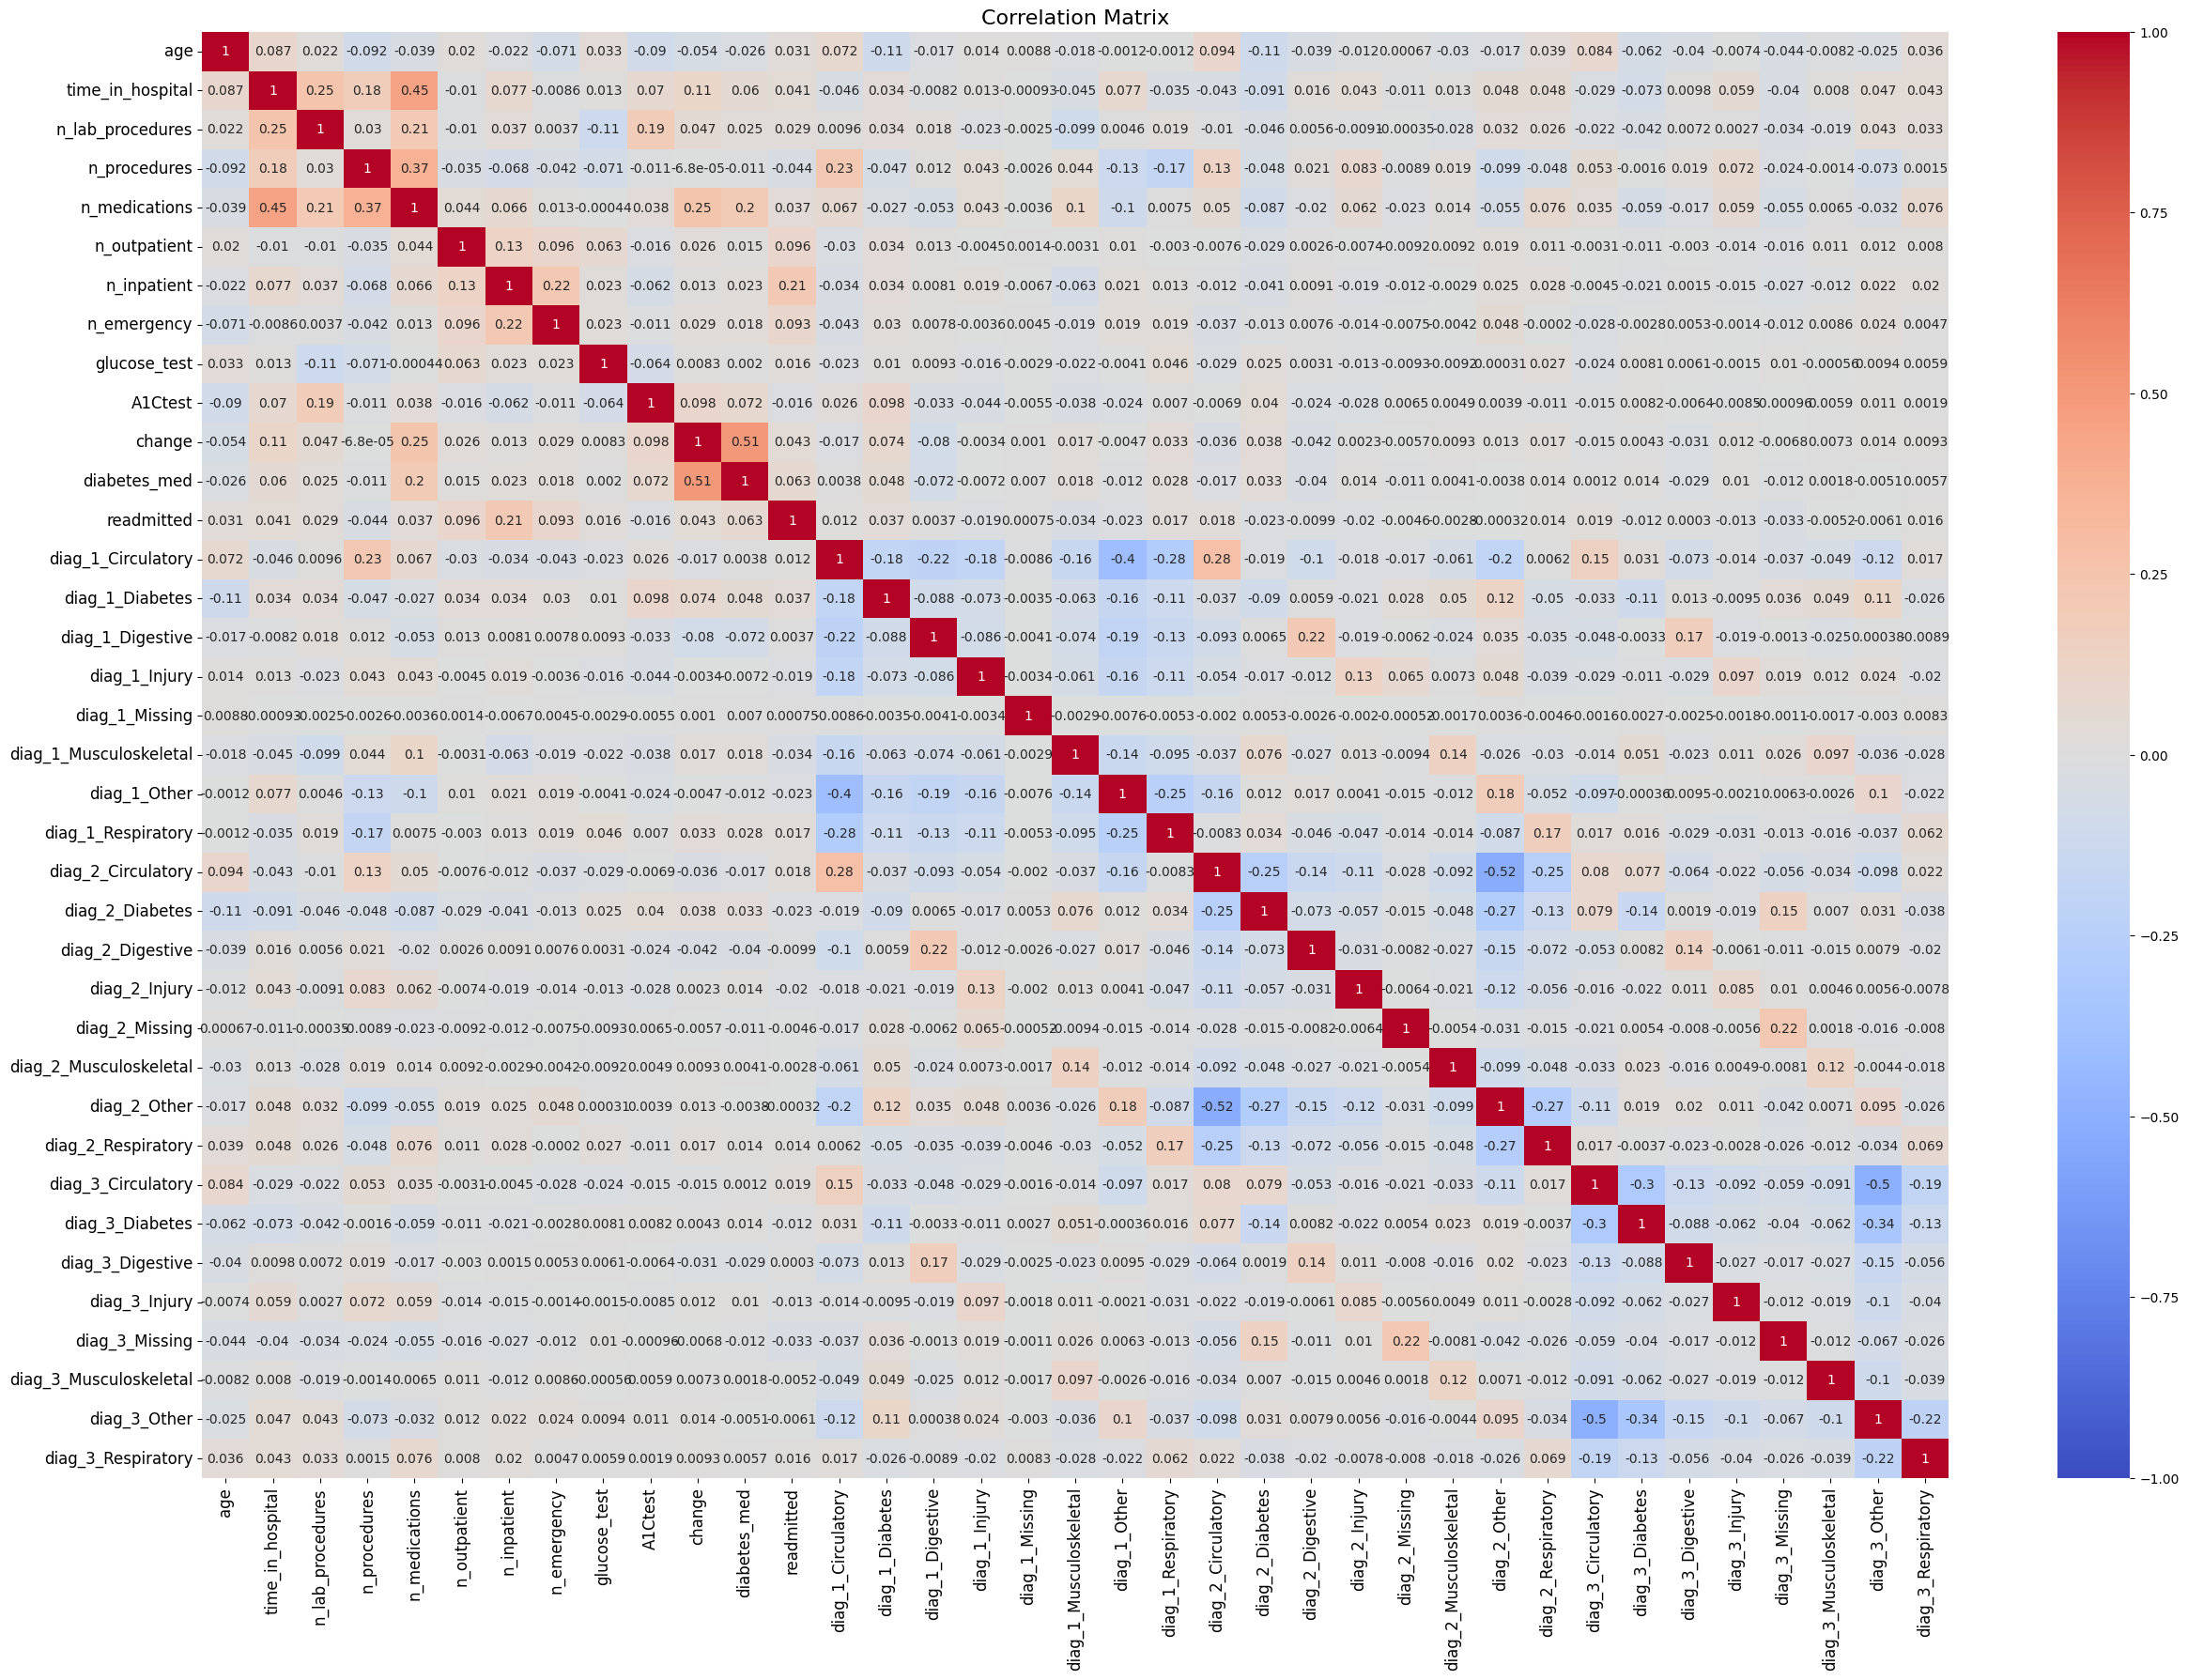

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 20))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

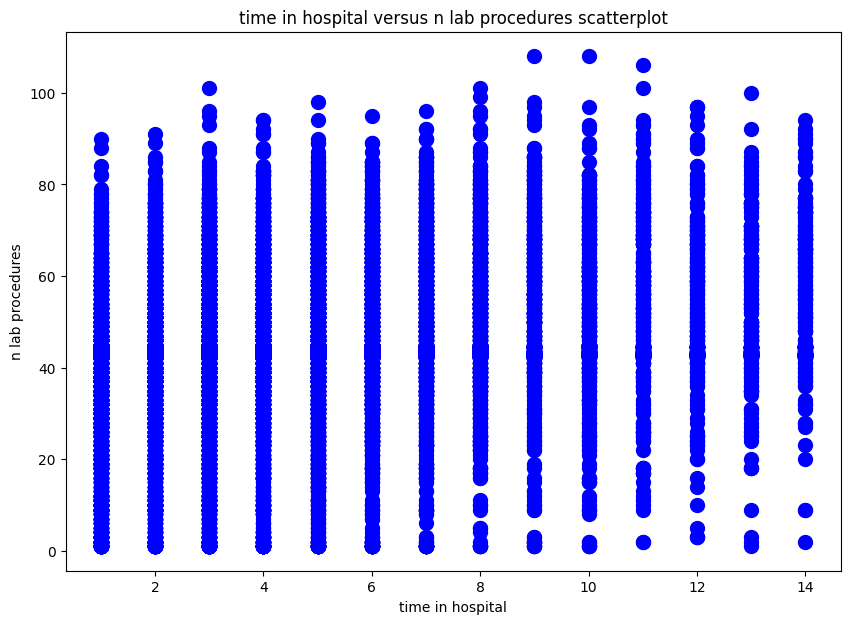

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(df['time_in_hospital'].to_numpy(), df['n_lab_procedures'].to_numpy(), color='blue', marker='o', s=100)
plt.title("time in hospital versus n lab procedures scatterplot")
plt.xlabel("time in hospital")
plt.ylabel("n lab procedures")
plt.show()

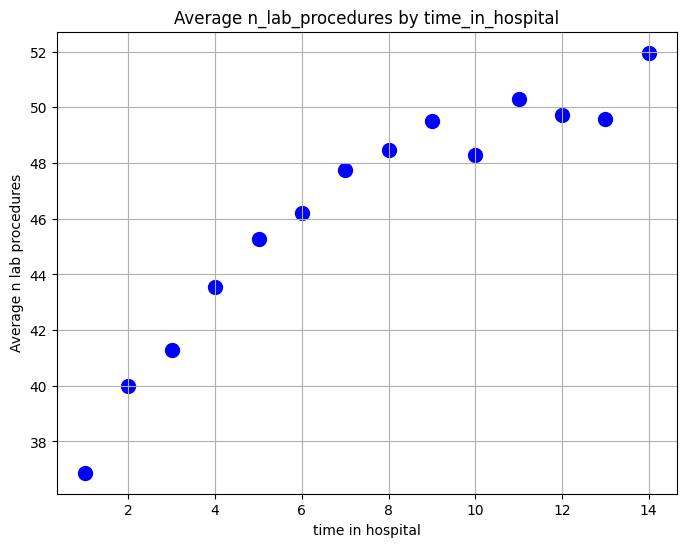

In [ ]:
# Calculate average values by category
average_df = df.groupby('time_in_hospital', as_index=False)['n_lab_procedures'].mean()

# Create scatter plot of averages
plt.figure(figsize=(8, 6))
plt.scatter(average_df['time_in_hospital'], average_df['n_lab_procedures'], color='blue', marker='o', s=100)
plt.title("Average n_lab_procedures by time_in_hospital")
plt.xlabel("time in hospital")
plt.ylabel("Average n lab procedures")
plt.grid(True)
plt.show()

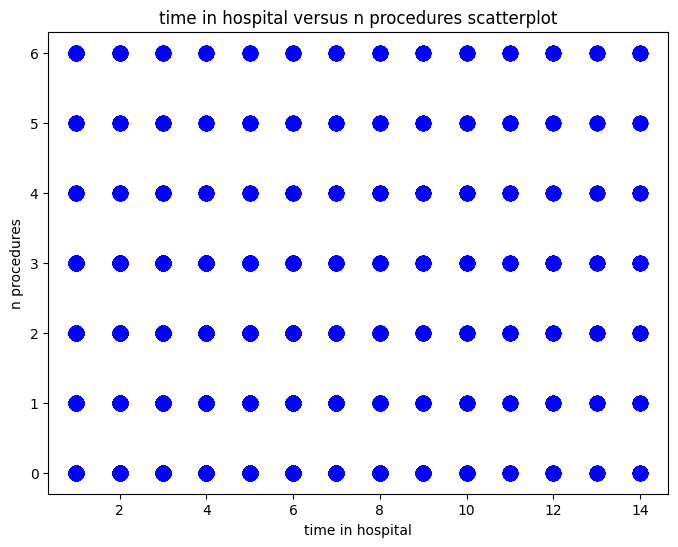

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['time_in_hospital'].to_numpy(), df['n_procedures'].to_numpy(), color='blue', marker='o', s=100)
plt.title("time in hospital versus n procedures scatterplot")
plt.xlabel("time in hospital")
plt.ylabel("n procedures")
plt.show()

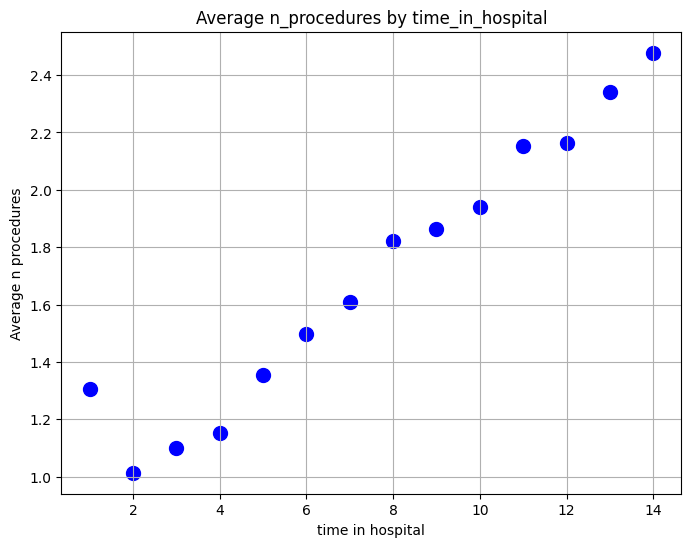

In [ ]:
average_df = df.groupby('time_in_hospital', as_index=False)['n_procedures'].mean()

# Create scatter plot of averages
plt.figure(figsize=(8, 6))
plt.scatter(average_df['time_in_hospital'], average_df['n_procedures'], color='blue', marker='o', s=100)
plt.title("Average n_procedures by time_in_hospital")
plt.xlabel("time in hospital")
plt.ylabel("Average n procedures")
plt.grid(True)
plt.show()

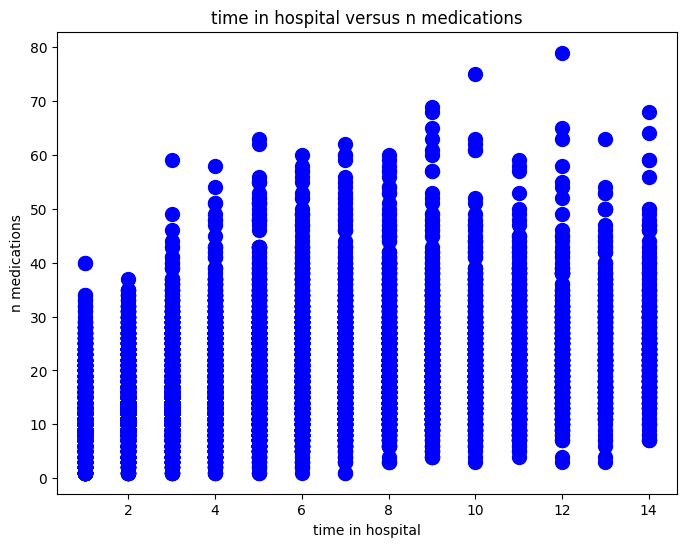

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['time_in_hospital'].to_numpy(), df['n_medications'].to_numpy(), color='blue', marker='o', s=100)
plt.title("time in hospital versus n medications")
plt.xlabel("time in hospital")
plt.ylabel("n medications")
plt.show()

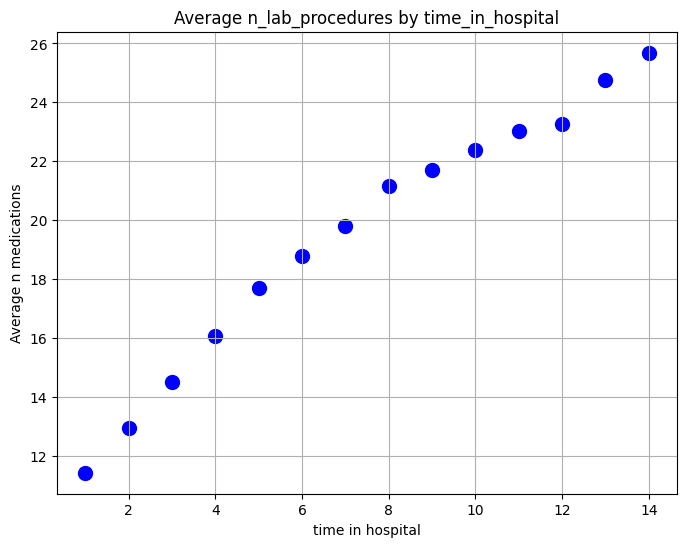

In [ ]:
average_df = df.groupby('time_in_hospital', as_index=False)['n_medications'].mean()

# Create scatter plot of averages
plt.figure(figsize=(8, 6))
plt.scatter(average_df['time_in_hospital'], average_df['n_medications'], color='blue', marker='o', s=100)
plt.title("Average n_medications by time_in_hospital")
plt.xlabel("time in hospital")
plt.ylabel("Average n medications")
plt.grid(True)
plt.show()

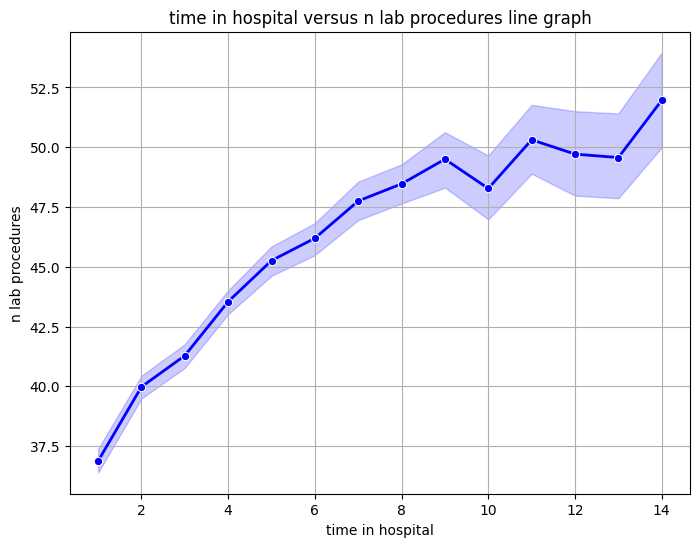

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='time_in_hospital', y='n_lab_procedures', data=df, marker='o', color='blue', linewidth=2)
plt.title("time in hospital versus n lab procedures line graph")
plt.xlabel("time in hospital")
plt.ylabel("n lab procedures")
plt.grid(True)  # Optional: add grid lines
plt.show()

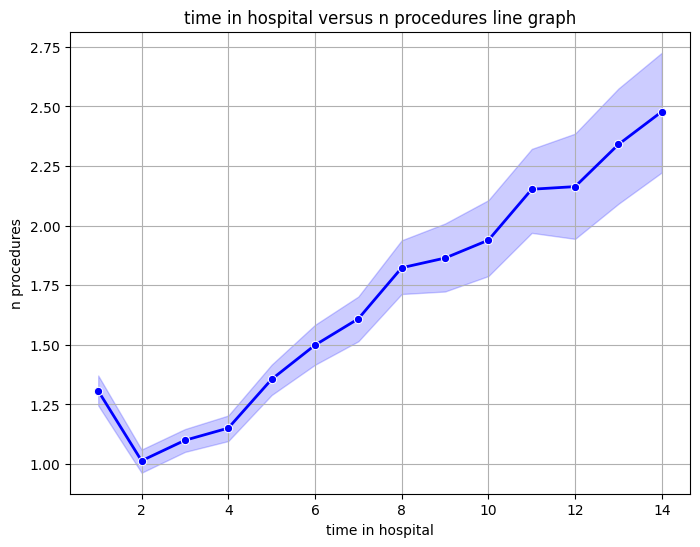

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='time_in_hospital', y='n_procedures', data=df, marker='o', color='blue', linewidth=2)
plt.title("time in hospital versus n procedures line graph")
plt.xlabel("time in hospital")
plt.ylabel("n procedures")
plt.grid(True)  # Optional: add grid lines
plt.show()

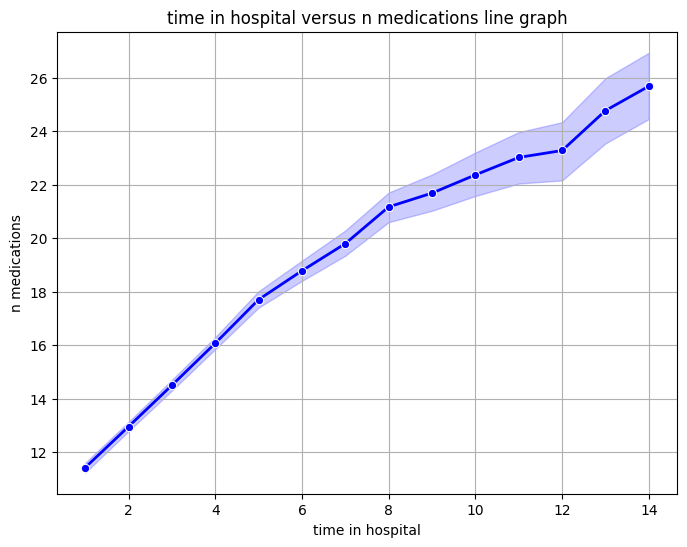

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='time_in_hospital', y='n_medications', data=df, marker='o', color='blue', linewidth=2)
plt.title("time in hospital versus n medications line graph")
plt.xlabel("time in hospital")
plt.ylabel("n medications")
plt.grid(True)  # Optional: add grid lines
plt.show()

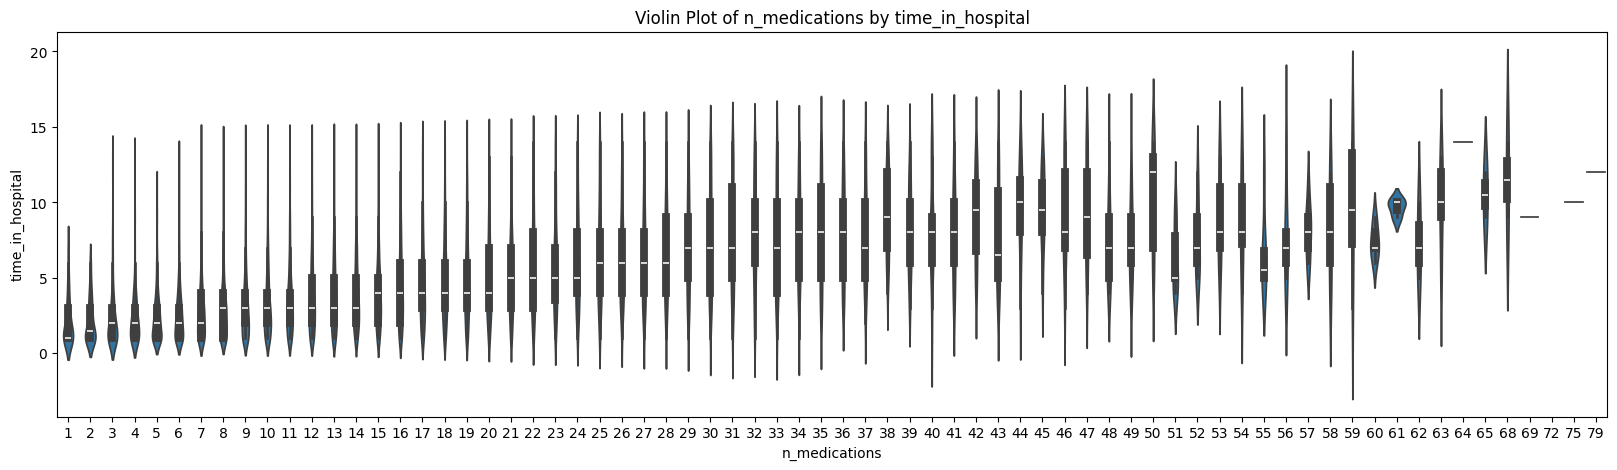

In [ ]:
plt.figure(figsize=(20, 5))
sns.violinplot(x='n_medications', y='time_in_hospital', data=df)
plt.title('Violin Plot of n_medications by time_in_hospital')
plt.xlabel('n_medications')
plt.ylabel('time_in_hospital')
plt.show()

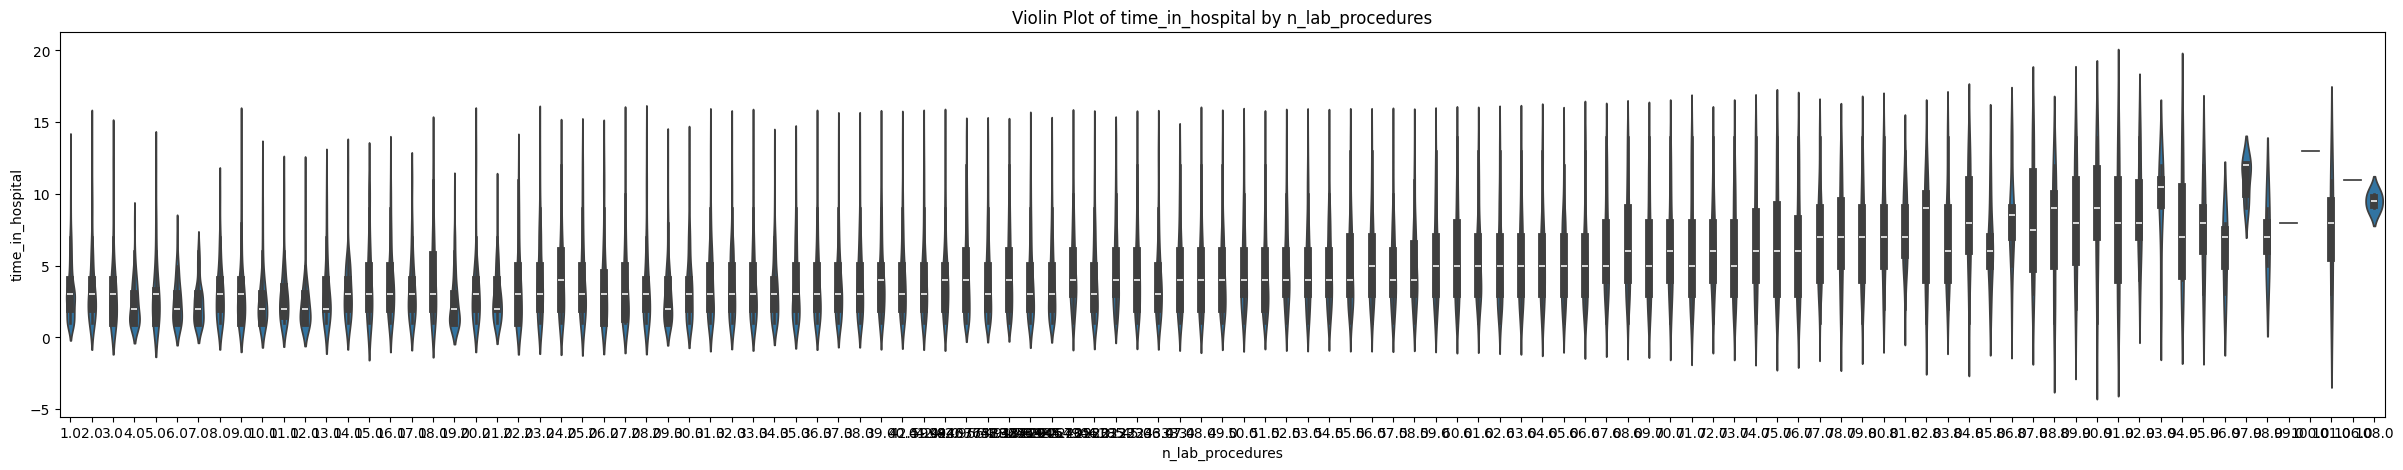

In [ ]:
plt.figure(figsize=(30, 5))
sns.violinplot(x='n_lab_procedures', y='time_in_hospital', data=df)
plt.title('Violin Plot of time_in_hospital by n_lab_procedures')
plt.xlabel('n_lab_procedures')
plt.ylabel('time_in_hospital')
plt.show()

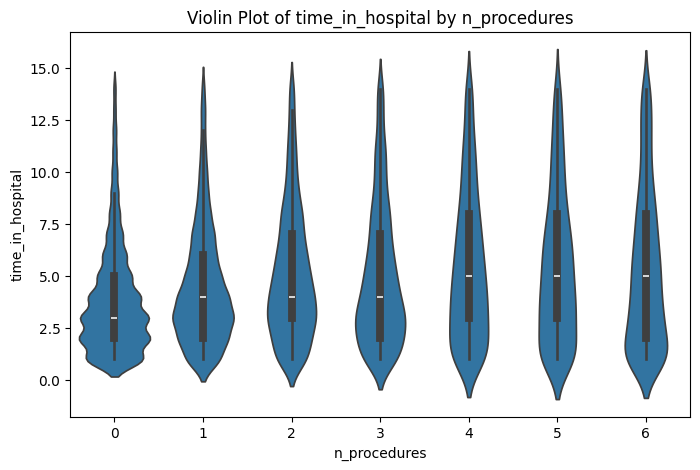

In [ ]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='n_procedures', y='time_in_hospital', data=df)
plt.title('Violin Plot of time_in_hospital by n_procedures')
plt.xlabel('n_procedures')
plt.ylabel('time_in_hospital')
plt.show()

In [ ]:
df.dropna(subset=['time_in_hospital'], inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns=['time_in_hospital'])
y = df['time_in_hospital']
print(X.isnull().sum())

age                       0
n_lab_procedures          0
n_procedures              0
n_medications             0
n_outpatient              0
n_inpatient               0
n_emergency               0
glucose_test              0
A1Ctest                   0
change                    0
diabetes_med              0
readmitted                0
diag_1_Circulatory        0
diag_1_Diabetes           0
diag_1_Digestive          0
diag_1_Injury             0
diag_1_Missing            0
diag_1_Musculoskeletal    0
diag_1_Other              0
diag_1_Respiratory        0
diag_2_Circulatory        0
diag_2_Diabetes           0
diag_2_Digestive          0
diag_2_Injury             0
diag_2_Missing            0
diag_2_Musculoskeletal    0
diag_2_Other              0
diag_2_Respiratory        0
diag_3_Circulatory        0
diag_3_Diabetes           0
diag_3_Digestive          0
diag_3_Injury             0
diag_3_Missing            0
diag_3_Musculoskeletal    0
diag_3_Other              0
diag_3_Respiratory  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#df.drop(columns=['time_in_hospital'])

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(y_train, predictions)

6.551433420073685

In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

2.559576804878823

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [ ]:
print(np.mean(scores))

0.2700323414083396



# ***Trying models trained on other columns***


**average n_procedures**

In [ ]:
average_df = df.groupby('time_in_hospital', as_index=False)['n_procedures'].mean()

In [ ]:
X = average_df.drop(columns=['time_in_hospital'])
y = average_df['time_in_hospital']
print(X.isnull().sum())

n_procedures    0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

0.3300989726987401

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=8, scoring='r2')
print(np.mean(scores))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

**n_medications, n_lab_procedures, n_procedures**

In [ ]:
medications_procedures = df[['time_in_hospital', 'n_medications', 'n_lab_procedures', 'n_procedures']]

In [ ]:
X = medications_procedures.drop(columns=['time_in_hospital'])
y = medications_procedures['time_in_hospital']
print(X.isnull().sum())

n_medications       0
n_lab_procedures    0
n_procedures        0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

2.6468178837255327

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(np.mean(scores))

0.22276824619680075


**average n_medications**

In [ ]:
average_n_medications_df = df.groupby('time_in_hospital', as_index=False)['n_medications'].mean()

In [ ]:
X = average_n_medications_df.drop(columns=['time_in_hospital'])
y = average_n_medications_df['time_in_hospital']
print(X.isnull().sum())

n_medications    0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

0.6152259663821031

**average n_medications and average n_procedures**



In [ ]:
avg_meds_and_prods = pd.merge(average_n_medications_df, average_df, on='time_in_hospital', how='outer')

In [ ]:
X = avg_meds_and_prods.drop(columns=['time_in_hospital'])
y = avg_meds_and_prods['time_in_hospital']
print(X.isnull().sum())

n_medications    0
n_procedures     0
dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_train, predictions))

0.3114073038977491